# Fehlerfortpflanzung

## Messdaten: Karussel

Wir stellen uns im Folgenden ein Kinderkarussel vor und wir wollen die Geschwindigkeit der Feuerwehrautos ermitteln. Das Auto selbst verfügt über kein Tachometer - es bleibt also eigentlich nur die Möglichkeit, die Zeit eines Umlaufs zu stoppen und aus der Geometrie des Karussells den zurückgelegten Weg zu bestimmen. Daraus lässt sich die Geschwindigkeit leicht berechnen.

Beispielsweise könnte man die Zeit nach jedem Umlauf messen, die näherungsweise konstant sein sollte (bis auf die 1. Runde, wo noch beschleunigt wird). Es könnte sich also ein linearer Zusammenhang zwischen zurückgelegtem Weg und der benötigten Zeit vermuten:

$$y = t(x) = m\cdot x + b $$

Folgende Messwerte wurden ermittelt:

* Weg  $x$ (m): 12, 24, 36, 42, 60, 72, 84, 96, 108, 120
* Zeit $t$ (s): 12.2, 17, 22.1, 33.2, 34.4, 59.1, 60.2, 65.7, 69.9, 70.1

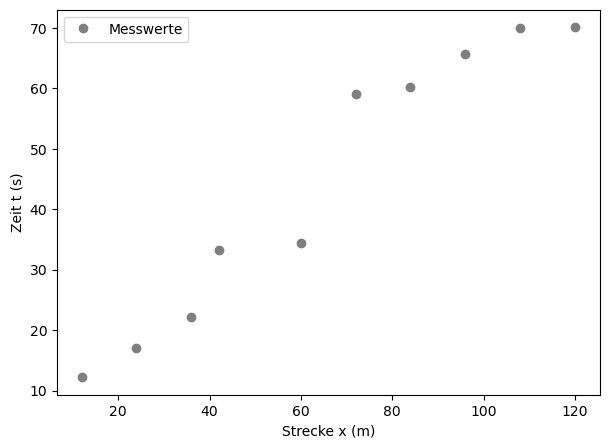

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.figure(figsize=(7,5)) # Plot-Größe
plt.rcParams['font.size'] = 10; # Schriftgröße

x = [12, 24, 36, 42, 60, 72, 84, 96, 108, 120] # Messwerte der Strecke x in m
t = [12.2, 17, 22.1, 33.2, 34.4, 59.1, 60.2, 65.7, 69.9, 70.1] # Messwerte der Zeit t in sek.
x = np.array(x) #konvertiere die Messwerte in ein Numpy-Array
t = np.array(t) #konvertiere die Messwerte in ein Numpy-Array

plt.plot(x,t, 'o', label = 'Messwerte', ms=6, color="tab:gray")
plt.xlabel('Strecke x (m)')
plt.ylabel('Zeit t (s)')
plt.legend()
plt.show()

## Lineare Regression

Um die Geschwindigkeit des Karussels zu bestimmen benötigen wir die Ausgleichsgerade.
Weitere Information dazu findest du [hier](1_Kurvenanpassung) im Vorlesungsskript oder im [Tutorial zur Linearen Regression](T_LinReg).
Im folgenden `code` berechnen wir die Steigung einmal analytisch und einmal mittels . 

Die analytischen Parameter lauten:
Die Steigung ist 		 m = 0.6067 s/m
Der Ordinatenabschnitt ist 	 b = 4.7148 s
Die scipy-Fitparameter lauten:
Die Steigung ist 		 m = (0.6067 +- 0.0534) s/m
Der Ordinatenabschnitt ist 	 b = (4.7148 +- 3.9581) s


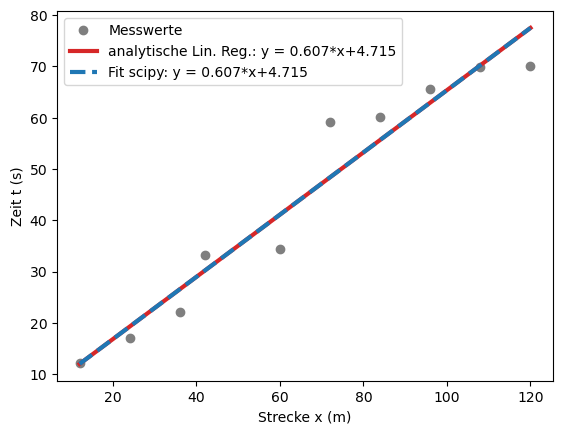

In [2]:
# Analytisch:
m = (np.mean(x*t) - np.mean(x)*np.mean(t))/(np.mean(x**2) - np.mean(x)**2)
b = np.mean(t) - m * np.mean(x)

# Fit-Funktion:
from scipy.optimize import curve_fit
def fit_lin(x, b, a): # Fit Funktion für eine Gerade mit Steigung b
    return b*x + a
fit_out = curve_fit(fit_lin, x, t)

print('Die analytischen Parameter lauten:')
print('Die Steigung ist \t\t m = %5.4f s/m' %(m))
print('Der Ordinatenabschnitt ist \t b = %5.4f s' %(b))

print('Die scipy-Fitparameter lauten:')
print('Die Steigung ist \t\t m = (%5.4f +- %5.4f) s/m' %(fit_out[0][0], np.sqrt(fit_out[1][0][0])))
print('Der Ordinatenabschnitt ist \t b = (%5.4f +- %5.4f) s' %(fit_out[0][1], np.sqrt(fit_out[1][1][1])))

plt.plot(x,t, 'o', label = 'Messwerte', ms=6, color="tab:gray")
plt.plot(x,m*x+b,lw=3, color="tab:red", label = 'analytische Lin. Reg.: y = %5.3f*x+%5.3f' %(m,b))  # plot Ausgleichsgerade mit m und b
plt.plot(x,fit_out[0][0]*x+fit_out[0][1], '--',lw=3, color="tab:blue", label = 'Fit scipy: y = %5.3f*x+%5.3f' %(fit_out[0][0],fit_out[0][1]))  # plot Fitfunktion mit b und a

plt.xlabel('Strecke x (m)')
plt.ylabel('Zeit t (s)')
plt.legend()
plt.show()

## Geschwindigkeit

Der Kehrwert der Steigung $m$ liefert uns die Geschwindigkeit des Karussells, wenn wir den Kehrwert berechnen:

In [3]:
v = 1/m
v_fit=1/fit_out[0][0]
print('Die Geschwindigkeit ermittelt mittels Analytik ist: v = %5.4f m/s = %5.4f km/h' %(v, v/1000*3600))
print('Die Geschwindigkeit ermittelt mittels Fit ist:      v = %5.4f m/s = %5.4f km/h' %(v_fit, v_fit/1000*3600))

Die Geschwindigkeit ermittelt mittels Analytik ist: v = 1.6484 m/s = 5.9342 km/h
Die Geschwindigkeit ermittelt mittels Fit ist:      v = 1.6484 m/s = 5.9342 km/h


## Unsicherheit der Steigung

Wie bereits oben schon erwähnt, hat die Regressionen eine Abweichung. Daher müssen wir uns jetzt fragen, was der Fehler der Geschwindigkeit ist. Diesen bekommen wir aus der Steigung $m$. Das heißt wir benötigen zuerst den Fehler von $m$: 

$$s_m = s_t \cdot \sqrt{\frac{1}{N\cdot (\overline{x^2} - (\overline x)^2)}} \quad \textrm{mit} \quad s_t = \sqrt{\frac{1}{N-2}\sum(t_i - mx_i - b)^2 }$$

Der Vollständigkeit halber berechnen wir ebenfalls den Fehler für $b$:

$$s_b  = s_m \cdot \sqrt{\overline{x^2}}$$

In [4]:
N = len(t)
diff_t = 0
for i in range(N):
    diff_t += ( t[i] - m * x[i] - b )**2

streuung_t = 1/(N-2)*diff_t
s_t = np.sqrt(streuung_t)
s_m = s_t * np.sqrt(1 / (N*(np.mean(x**2) - np.mean(x)**2)))
s_b = s_m * np.sqrt(np.mean(x**2))

print('Die Unsicherheit von t ist \t s_t = %5.4f s' %(s_t))
print('Die Unsicherheit von m ist \t s_m = %5.4f s/m' %(s_m))
print('Die Unsicherheit von b ist \t s_b = %5.4f s' %(s_b))

Die Unsicherheit von t ist 	 s_t = 5.8831 s
Die Unsicherheit von m ist 	 s_m = 0.0534 s/m
Die Unsicherheit von b ist 	 s_b = 3.9581 s


Die Fitroutine in Python gibt uns ebenfalls Unsicherheiten in Form von der Kovarianz-Matrix aus. Auf der Diagonale stehen die Varianzen, $s^2$, auf den Nicht-Diagonalelementen stehen die Kovarianzen (Korrelationsterme zwischen $m$ und $b$):

$$\mathrm{cov}(m,b) = 
\begin{pmatrix}
 s_m^2 & s_{mb} \\
 s_{bm} & s_b^2
\end{pmatrix} $$

Die Unsicherheiten für $m$ und $b$ erhalten wir also aus der Wurzel von den Diagonalelementen. 

In [5]:
print('Die Kovarianzmatrix hat die folgende Form: \n', fit_out[1])
print('')
print('Die Unsicherheit von m ist \t s_m = %5.4f s/m' %(np.sqrt(fit_out[1][0][0])))
print('Die Unsicherheit von b ist \t s_b = %5.4f s' %(np.sqrt(fit_out[1][1][1])))

Die Kovarianzmatrix hat die folgende Form: 
 [[ 2.85371544e-03 -1.86632993e-01]
 [-1.86632993e-01  1.56668987e+01]]

Die Unsicherheit von m ist 	 s_m = 0.0534 s/m
Die Unsicherheit von b ist 	 s_b = 3.9581 s


## Unsicherheit der Geschwindigkeit mittels Fehlerfortpflanzung

Auch die Unsicherheiten stimmen für beide Methoden perfekt überein.

Nun interessiert uns allerdings der absolute Fehler der geschätzen Geschwindigkeit. Da die Geschwindigkeit der Kehrwert der Steigung ist ($v = \frac{1}{m}$), müssen wir Fehlerfortpflanzung anwenden. Der Fehler wirkt sich wiefolgt auf den Kehrwert aus: 

$$\Delta v = \left|\frac{\partial v}{\partial m}\right|\cdot \Delta m = \left| -\frac{1}{m^2} \right| \cdot s_m = \frac{1}{m^2} \cdot s_m = s_v$$

Da beide Methoden die gleichen Werte für Schätzungen und Unsicherheiten ausgeben, ersparen wir uns ab nun die Berechnung der Geschwindigkeit inkl. Unsicherheit für beide Methoden. Die Fehlerrechnung wird nur noch für die analytische Methode ausgeführt, da die Werte für bei Methoden die gleichen sind:

In [6]:
s_v = 1/m**2 * s_m
print('Die Unsicherheit von v ist \t s_v = %5.4f m/s' %(s_v))

Die Unsicherheit von v ist 	 s_v = 0.1452 m/s


Das Messergebnis kann also wiefolgt angegeben werden:
    
$$v = (1,6484 \pm 0,1452)\,\mathrm{m/s}$$    

**Ist diese Angabe sinnvoll?** Wenn wir das so konkret fragen, dann vermutlich nicht...
Wenn der Fehler bereits in der ersten Stelle nach dem Komma signifikant bemerkbar den Schätzwert beeinflusst, warum sollte man sich dann die Mühe machen noch weitere Nachkommastellen hinzuschreiben? Also **sinnvoll runden**:

$$v = (1,6 \pm 0,2)\,\mathrm{m/s}$$    

Warum 0,2 und nicht 0,1? **Fehler werden immer aufgerundet!**

Nun könnte noch der relative Fehler $\Delta v/v$ berechnet werden.

In [7]:
print('Die relative Unsicherheit von v ist \t s_v = %5.4f %%' %(s_v/v*100))

Die relative Unsicherheit von v ist 	 s_v = 8.8057 %
